In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
data = pd.read_csv('pbp_data/2021-22.csv')

In [7]:
#For quick refernce, here's an Enum for `EVENTMSGTYPE`
#This list may be incomplete as a thourogh play by play scan is necessary

from enum import Enum

class EventMsgType(Enum):
    FIELD_GOAL_MADE = 1
    FIELD_GOAL_MISSED = 2
    FREE_THROW = 3
    REBOUND = 4
    TURNOVER = 5
    FOUL = 6
    VIOLATION = 7
    SUBSTITUTION = 8
    TIMEOUT = 9
    JUMP_BALL = 10
    EJECTION = 11
    PERIOD_BEGIN = 12
    PERIOD_END = 13

In [8]:
turnovers = data.loc[data.EVENTMSGTYPE == 5].fillna("")

In [9]:
turnover_types = turnovers.loc[turnovers.HOMEDESCRIPTION != ""].EVENTMSGACTIONTYPE.unique()

In [10]:
turnover_type_dict = {}
for turnover_type in turnover_types:
    cur_turnover = turnovers.loc[turnovers.EVENTMSGACTIONTYPE == turnover_type].iloc[0]
    home_desc = cur_turnover.HOMEDESCRIPTION
    visitor_desc = cur_turnover.VISITORDESCRIPTION
    if "STL" in home_desc or home_desc == "":
        turnover_desc = visitor_desc.rsplit("(", 1)[0].split(" ", 1)[1]
    else:
        turnover_desc = home_desc.rsplit("(", 1)[0].split(" ", 1)[1]
    print(f"Turnover type: {turnover_type}, description: {turnover_desc}")
    turnover_type_dict[turnover_type] = turnover_desc.strip()

Turnover type: 1, description: Bad Pass Turnover 
Turnover type: 45, description: Out of Bounds - Bad Pass Turnover Turnover 
Turnover type: 0, description: No Turnover 
Turnover type: 11, description: Turnover: Shot Clock 
Turnover type: 2, description: Lost Ball Turnover 
Turnover type: 40, description: Out of Bounds Lost Ball Turnover 
Turnover type: 37, description: Offensive Foul Turnover 
Turnover type: 4, description: Traveling Turnover 
Turnover type: 39, description: Step Out of Bounds Turnover 
Turnover type: 6, description: Double Dribble Turnover 
Turnover type: 19, description: Kicked Ball Violation Turnover 
Turnover type: 13, description: Backcourt Turnover 
Turnover type: 8, description: 3 Second Violation Turnover 
Turnover type: 15, description: Offensive Goaltending Turnover 
Turnover type: 9, description: Turnover: 5 Second Violation 
Turnover type: 7, description: Discontinue Dribble Turnover 
Turnover type: 20, description: Illegal Assist Turnover 
Turnover type: 

In [11]:
len(turnovers)

16307

In [12]:
5153+1652+2756+1800+840+661

12862

In [13]:
12862/14321

0.8981216395503108

In [14]:
turnover_counts = {}
for turnover_type in turnover_types:
    print(f"Turnover type: {turnover_type}-{turnover_type_dict[turnover_type]}, total items: {len(turnovers.loc[turnovers.EVENTMSGACTIONTYPE == turnover_type])}")
    turnover_counts[turnover_type] = len(turnovers.loc[turnovers.EVENTMSGACTIONTYPE == turnover_type])

Turnover type: 1-Bad Pass Turnover, total items: 5876
Turnover type: 45-Out of Bounds - Bad Pass Turnover Turnover, total items: 1871
Turnover type: 0-No Turnover, total items: 15
Turnover type: 11-Turnover: Shot Clock, total items: 790
Turnover type: 2-Lost Ball Turnover, total items: 3160
Turnover type: 40-Out of Bounds Lost Ball Turnover, total items: 946
Turnover type: 37-Offensive Foul Turnover, total items: 2024
Turnover type: 4-Traveling Turnover, total items: 753
Turnover type: 39-Step Out of Bounds Turnover, total items: 434
Turnover type: 6-Double Dribble Turnover, total items: 35
Turnover type: 19-Kicked Ball Violation Turnover, total items: 13
Turnover type: 13-Backcourt Turnover, total items: 112
Turnover type: 8-3 Second Violation Turnover, total items: 94
Turnover type: 15-Offensive Goaltending Turnover, total items: 60
Turnover type: 9-Turnover: 5 Second Violation, total items: 23
Turnover type: 7-Discontinue Dribble Turnover, total items: 23
Turnover type: 20-Illegal A

Turnover type: 1-Bad Pass Turnover, total items: 5153

Turnover type: 45-Out of Bounds - Bad Pass Turnover Turnover, total items: 1652

Turnover type: 2-Lost Ball Turnover, total items: 2756

Turnover type: 40-Out of Bounds Lost Ball Turnover, total items: 840

Turnover type: 37-Offensive Foul Turnover, total items: 1800

Turnover type: 4-Traveling Turnover, total items: 661


In [15]:
bad_passes = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 1) | (turnovers.EVENTMSGACTIONTYPE == 45)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'BAD_PASS'}).sort_values(by='BAD_PASS', ascending=False)

lost_balls = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 2) | (turnovers.EVENTMSGACTIONTYPE == 40)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'LOST_BALL'}).sort_values(by='LOST_BALL', ascending=False)

offensive_fouls = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 37)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'OFF_FOUL'}).sort_values(by='OFF_FOUL', ascending=False)

travels = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 4)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'TRAVEL'}).sort_values(by='TRAVEL', ascending=False)

total_turnovers = turnovers.groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'TOTAL'}).sort_values(by='TOTAL', ascending=False)

In [16]:
merged_df = pd.merge(left=total_turnovers, right=bad_passes, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=lost_balls, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=offensive_fouls, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=travels, on=('PLAYER1_ID', 'PLAYER1_NAME'))

In [17]:
top_turnover_getters = merged_df.iloc[:20]

In [18]:
top_turnover_getters

,PLAYER1_ID,PLAYER1_NAME,TOTAL,BAD_PASS,LOST_BALL,OFF_FOUL,TRAVEL
0,201566,Russell Westbrook,184,124,34,18,2
1,201935,James Harden,158,94,44,8,5
2,1629027,Trae Young,141,111,23,2,1
3,203944,Julius Randle,126,47,43,25,8
4,1629636,Darius Garland,120,67,31,7,6
5,201939,Stephen Curry,119,63,35,9,6
6,1627734,Domantas Sabonis,117,38,44,26,4
7,203999,Nikola Jokic,117,75,23,10,5
8,1626157,Karl-Anthony Towns,115,43,20,39,9
9,200768,Kyle Lowry,112,78,15,9,4


In [19]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.55
team_root_dir = '../../team_logos_id/'
player_root_dir = f'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

In [20]:
plt.style.use('fivethirtyeight')

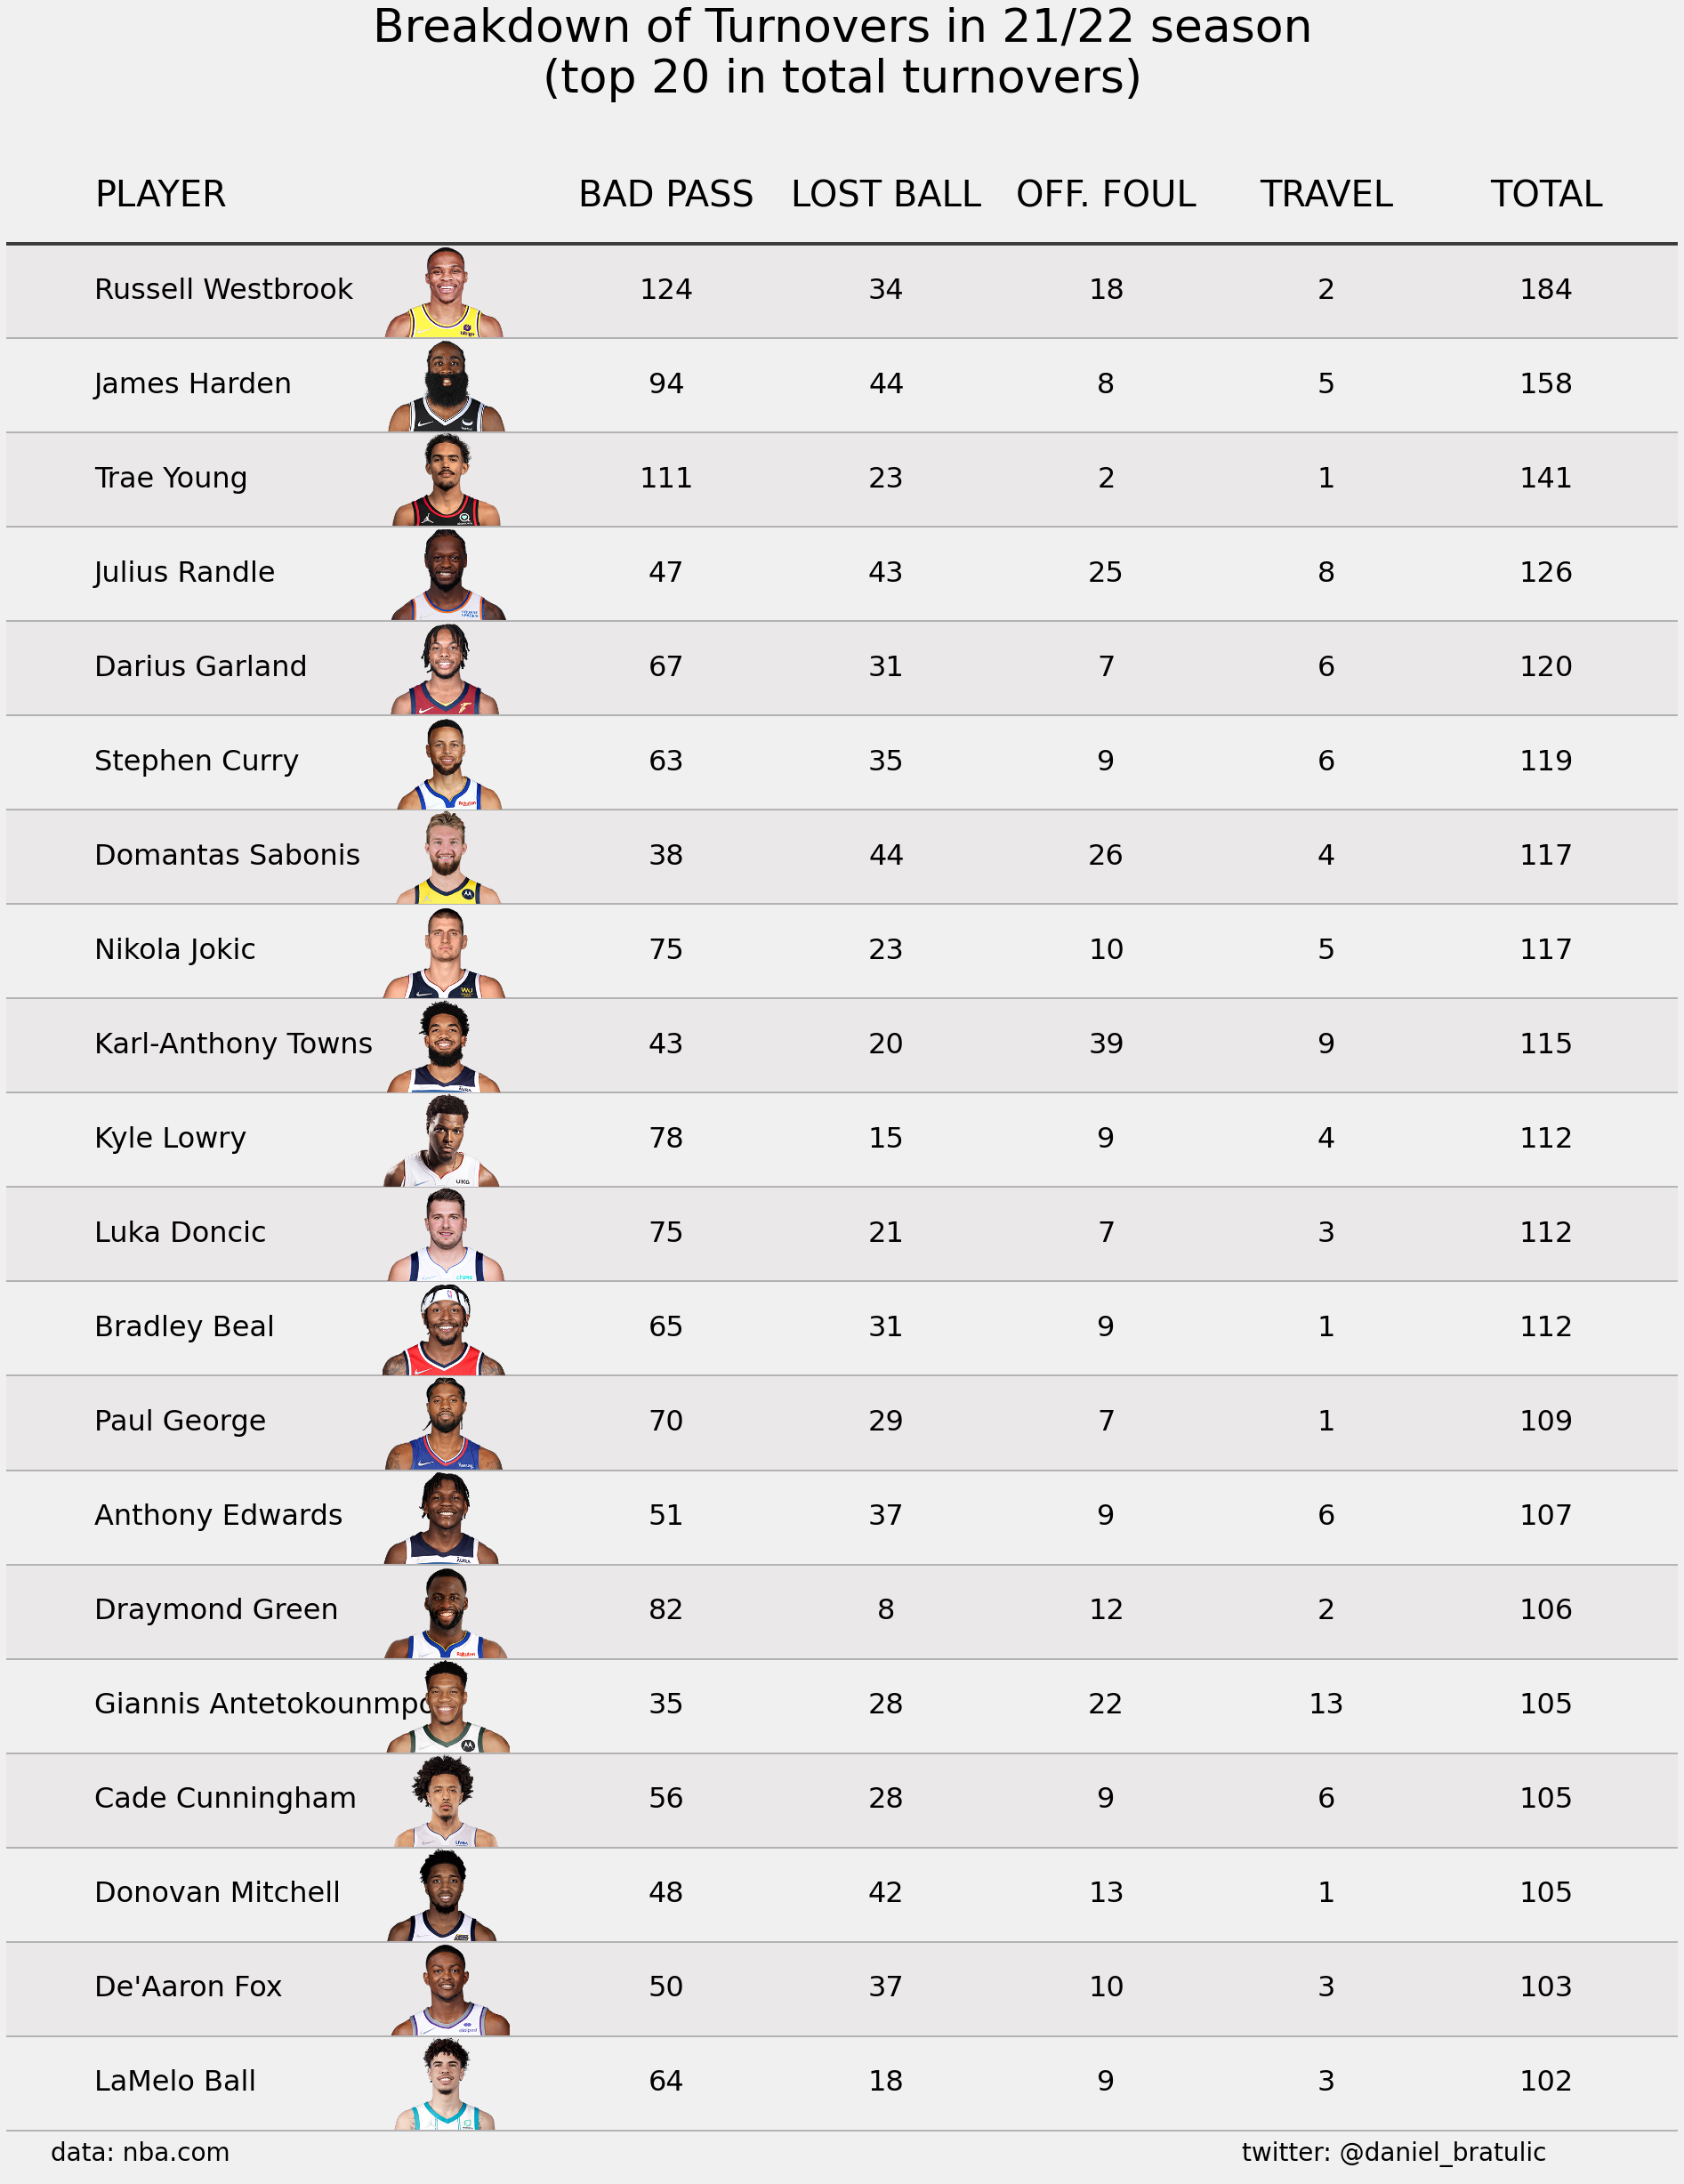

In [21]:
fig, ax = plt.subplots(figsize=(30, 40))
font_size = 32
font_title = 40
top = len(top_turnover_getters)
#top = 10


for i in range(top):
    item = top_turnover_getters.iloc[i]
    y_coord = top - i - 1
    if i % 2 == 1:
        color = '#EAE8E8'
        rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
        ax.add_patch(rect)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    ab = AnnotationBbox(get_player_img(item.PLAYER1_ID), (0.5, y_coord), frameon=False)
    ax.add_artist(ab)
    ax.text(x=0.1, y=y_coord, ha='left', va='center', s=item.PLAYER1_NAME, size=font_size)
    
    #ab = AnnotationBbox(get_player_img(item.PLAYER1_ID), (0.8, y_coord), frameon=False)
    #ax.add_artist(ab)
    ax.text(x=0.75, y=y_coord, ha='center', va='center', s=item.BAD_PASS, size=font_size)
    ax.text(x=1.0, y=y_coord, ha='center', va='center', s=item.LOST_BALL, size=font_size)
    ax.text(x=1.25, y=y_coord, ha='center', va='center', s=item.OFF_FOUL, size=font_size)
    ax.text(x=1.5, y=y_coord, ha='center', va='center', s=item.TRAVEL, size=font_size)
    ax.text(x=1.75, y=y_coord, ha='center', va='center', s=item.TOTAL, size=font_size)
    #ax.text(x=0.95, y=y_coord, ha='center', va='center', s=f"{item.COUNT}", size=font_size)
    #ax.text(x=2.2, y=y_coord, ha='center', va='center', s=f"{item.OPP_WIDE_OPEN_FG3_PCT:.2f}%", size=font_size)
    #ax.text(x=2.7, y=y_coord, ha='center', va='center', s=f"{item.DIFF:.2f}%", size=font_size)
    

    #ax.imshow(player_imgs[item.PLAYER_ID], extent=(0, 0.3, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    #ax.imshow(team_imgs[item.TEAM_ID], extent=(0.27, 0.38, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.1, y=top, s='PLAYER', ha='left', va='center', size=font_title)
#ax.text(x=0.5, y=top, ha='left', va='center', s="DUNKER", size=font_title)
ax.text(x=0.75, y=top, ha='center', va='center', s="BAD PASS", size=font_title)
ax.text(x=1, y=top, ha='center', va='center', s="LOST BALL", size=font_title)
ax.text(x=1.25, y=top, ha='center', va='center', s="OFF. FOUL", size=font_title)
ax.text(x=1.5, y=top, ha='center', va='center', s="TRAVEL", size=font_title)
ax.text(x=1.75, y=top, ha='center', va='center', s="TOTAL", size=font_title)
#ax.text(x=2.7, y=top, ha='center', va='center', s="DIFF", size=font_title)

ax.text(x=1.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=28)
ax.text(x=0.05, y=-0.75, s='data: nba.com', ha='left', va='center', size=28)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("Breakdown of Turnovers in 21/22 season\n(top 20 in total turnovers)", size=52)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=1.9)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('table_dunkers.png', dpi=120, bbox_inches='tight')

In [22]:
Turnover type: 1-Bad Pass Turnover, total items: 5153
Turnover type: 45-Out of Bounds - Bad Pass Turnover Turnover, total items: 1652
Turnover type: 2-Lost Ball Turnover, total items: 2756
Turnover type: 40-Out of Bounds Lost Ball Turnover, total items: 840

SyntaxError: invalid syntax (<ipython-input-22-218ac1466391>, line 1)

In [23]:
bad_passes_live = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 1)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'BAD_PASS_LIVE'}).sort_values(by='BAD_PASS_LIVE', ascending=False)
bad_passes_dead = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 45)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'BAD_PASS_DEAD'}).sort_values(by='BAD_PASS_DEAD', ascending=False)
lost_balls_live = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 2)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'LOST_BALL_LIVE'}).sort_values(by='LOST_BALL_LIVE', ascending=False)
lost_balls_dead = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 40)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'LOST_BALL_DEAD'}).sort_values(by='LOST_BALL_DEAD', ascending=False)
offensive_fouls = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 37)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'OFF_FOUL'}).sort_values(by='OFF_FOUL', ascending=False)
travels = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 4)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'TRAVEL'}).sort_values(by='TRAVEL', ascending=False)

total_turnovers = turnovers.groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'TOTAL'}).sort_values(by='TOTAL', ascending=False)

merged_df = pd.merge(left=total_turnovers, right=bad_passes_live, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=bad_passes_dead, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=lost_balls_live, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=lost_balls_dead, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=offensive_fouls, on=('PLAYER1_ID', 'PLAYER1_NAME'))
merged_df = pd.merge(left=merged_df, right=travels, on=('PLAYER1_ID', 'PLAYER1_NAME'))

In [24]:
top_turnover_getters = merged_df.iloc[:20]

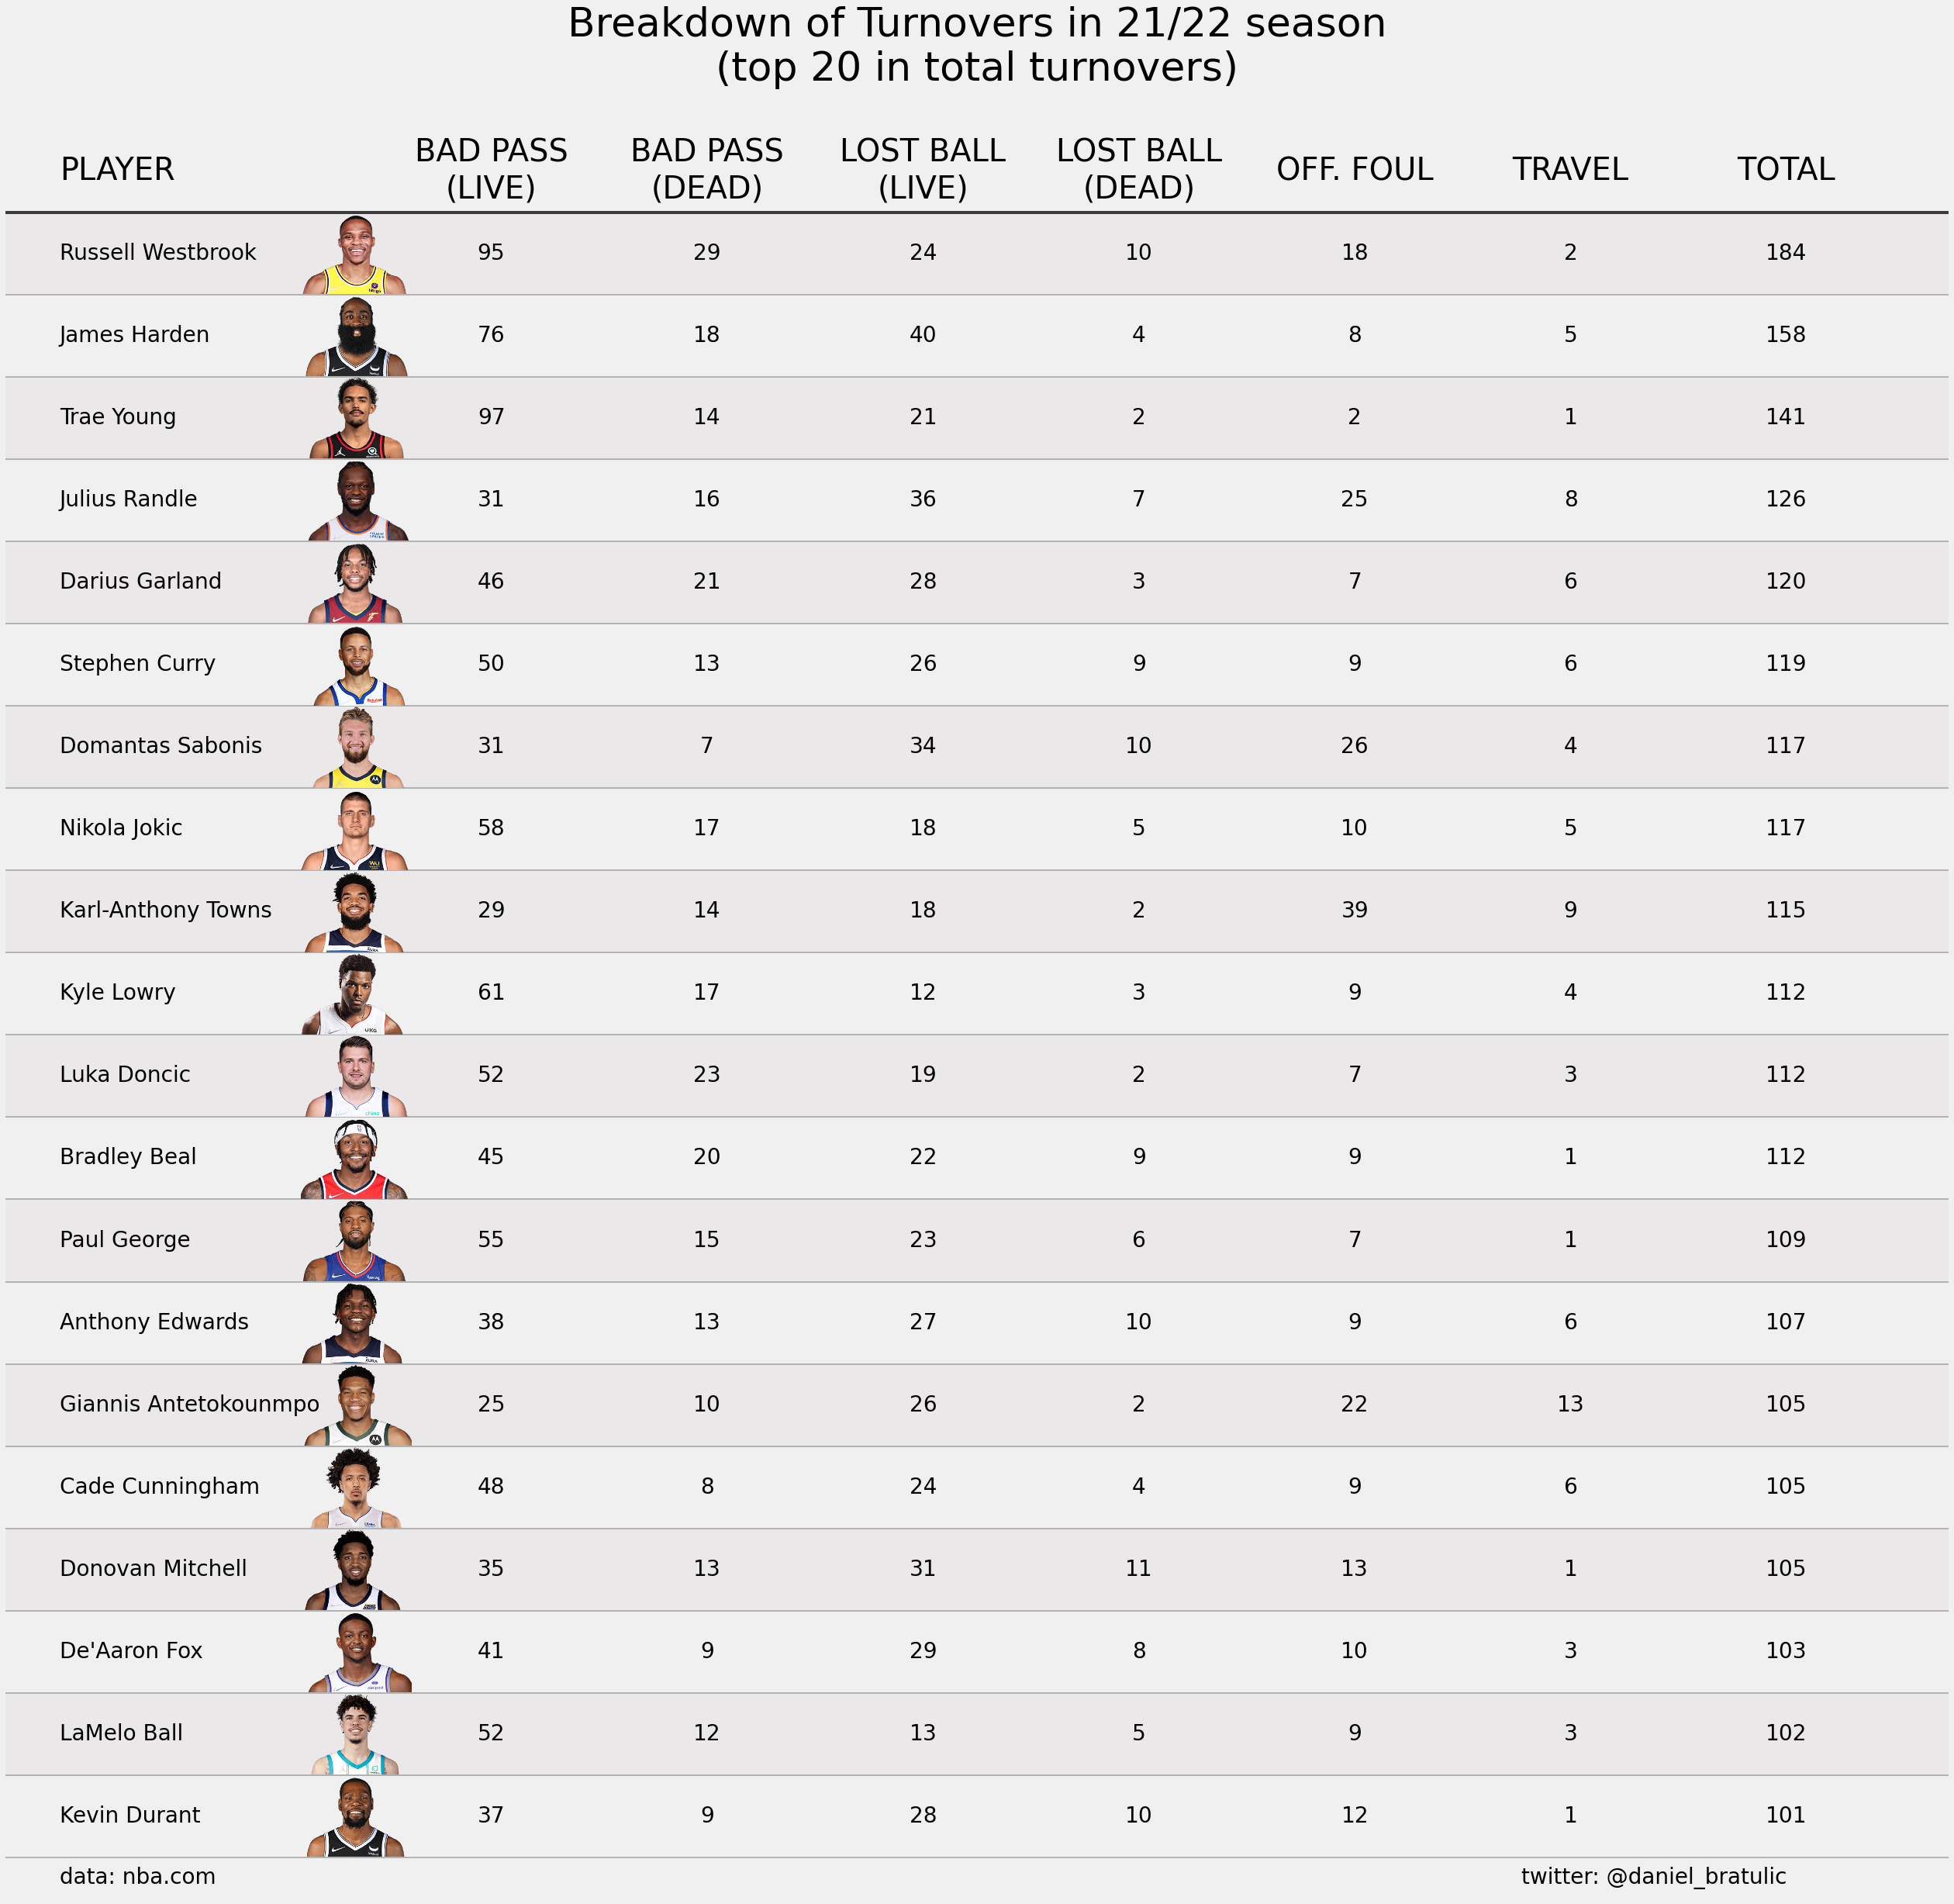

In [25]:
fig, ax = plt.subplots(figsize=(40, 40))
font_size = 28
font_title = 40
top = len(top_turnover_getters)
#top = 10


for i in range(top):
    item = top_turnover_getters.iloc[i]
    y_coord = top - i - 1
    if i % 2 == 1:
        color = '#EAE8E8'
        rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
        ax.add_patch(rect)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    ab = AnnotationBbox(get_player_img(item.PLAYER1_ID), (0.65, y_coord), frameon=False)
    ax.add_artist(ab)
    ax.text(x=0.1, y=y_coord, ha='left', va='center', s=item.PLAYER1_NAME, size=font_size)
    
    #ab = AnnotationBbox(get_player_img(item.PLAYER1_ID), (0.8, y_coord), frameon=False)
    #ax.add_artist(ab)
    ax.text(x=0.9, y=y_coord, ha='center', va='center', s=item.BAD_PASS_LIVE, size=font_size)
    ax.text(x=1.3, y=y_coord, ha='center', va='center', s=item.BAD_PASS_DEAD, size=font_size)
    ax.text(x=1.7, y=y_coord, ha='center', va='center', s=item.LOST_BALL_LIVE, size=font_size)
    ax.text(x=2.1, y=y_coord, ha='center', va='center', s=item.LOST_BALL_DEAD, size=font_size)
    ax.text(x=2.5, y=y_coord, ha='center', va='center', s=item.OFF_FOUL, size=font_size)
    ax.text(x=2.9, y=y_coord, ha='center', va='center', s=item.TRAVEL, size=font_size)
    ax.text(x=3.3, y=y_coord, ha='center', va='center', s=item.TOTAL, size=font_size)
    #ax.text(x=0.95, y=y_coord, ha='center', va='center', s=f"{item.COUNT}", size=font_size)
    #ax.text(x=2.2, y=y_coord, ha='center', va='center', s=f"{item.OPP_WIDE_OPEN_FG3_PCT:.2f}%", size=font_size)
    #ax.text(x=2.7, y=y_coord, ha='center', va='center', s=f"{item.DIFF:.2f}%", size=font_size)
    

    #ax.imshow(player_imgs[item.PLAYER_ID], extent=(0, 0.3, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    #ax.imshow(team_imgs[item.TEAM_ID], extent=(0.27, 0.38, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.1, y=top, s='PLAYER', ha='left', va='center', size=font_title)
#ax.text(x=0.5, y=top, ha='left', va='center', s="DUNKER", size=font_title)
ax.text(x=0.9, y=top, ha='center', va='center', s="BAD PASS\n(LIVE)", size=font_title)
ax.text(x=1.3, y=top, ha='center', va='center', s="BAD PASS\n(DEAD)", size=font_title)
ax.text(x=1.7, y=top, ha='center', va='center', s="LOST BALL\n(LIVE)", size=font_title)
ax.text(x=2.1, y=top, ha='center', va='center', s="LOST BALL\n(DEAD)", size=font_title)
ax.text(x=2.5, y=top, ha='center', va='center', s="OFF. FOUL", size=font_title)
ax.text(x=2.9, y=top, ha='center', va='center', s="TRAVEL", size=font_title)
ax.text(x=3.3, y=top, ha='center', va='center', s="TOTAL", size=font_title)
#ax.text(x=2.7, y=top, ha='center', va='center', s="DIFF", size=font_title)

ax.text(x=3.3, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=28)
ax.text(x=0.1, y=-0.75, s='data: nba.com', ha='left', va='center', size=28)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("Breakdown of Turnovers in 21/22 season\n(top 20 in total turnovers)", size=52)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=3.6)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('table_dunkers.png', dpi=120, bbox_inches='tight')

In [38]:
data = pd.read_csv('pbp_data/2019-20.csv')

In [39]:
turnovers = data.loc[data.EVENTMSGTYPE == 5].fillna("")

In [40]:
offensive_fouls = turnovers.loc[(turnovers.EVENTMSGACTIONTYPE == 37)].groupby(['PLAYER1_ID', 'PLAYER1_NAME']).size().to_frame().reset_index().rename(columns={0: 'OFF_FOUL'}).sort_values(by='OFF_FOUL', ascending=False)

In [41]:
offensive_fouls

,PLAYER1_ID,PLAYER1_NAME,OFF_FOUL
145,203507,Giannis Antetokounmpo,65
47,201935,James Harden,52
204,1626164,Devin Booker,46
229,1627734,Domantas Sabonis,44
104,203083,Andre Drummond,41
174,203944,Julius Randle,38
227,1627732,Ben Simmons,38
347,1628991,Jaren Jackson Jr.,36
234,1627742,Brandon Ingram,35
5,2730,Dwight Howard,35


In [37]:
offensive_fouls

,PLAYER1_ID,PLAYER1_NAME,OFF_FOUL
196,203507,Giannis Antetokounmpo,68
251,1626157,Karl-Anthony Towns,68
226,203944,Julius Randle,51
286,1627734,Domantas Sabonis,47
235,203994,Jusuf Nurkic,46
149,203083,Andre Drummond,43
72,201935,James Harden,43
229,203954,Joel Embiid,40
30,200746,LaMarcus Aldridge,39
71,201933,Blake Griffin,39
